## Observations and Insights 

Capomulin shown the maximum reduction in tumor growth
The number of data points for each Drug Regimen were all above 100 
mouse average weight versus average tumor volume for the Capomulin shows significant effectiveness in curing tumor of drug regimen.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [2]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on = 'Mouse ID')

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice.
mice_count = len(combined_data['Mouse ID'].unique())
mice_count

249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = combined_data.loc[combined_data.duplicated(subset =["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicated_mouse_ID = combined_data[combined_data["Mouse ID"] == 'g989']
duplicated_mouse_ID

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
duplicated_mouse_ID.count()


Mouse ID              13
Drug Regimen          13
Sex                   13
Age_months            13
Weight (g)            13
Timepoint             13
Tumor Volume (mm3)    13
Metastatic Sites      13
dtype: int64

In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_data = combined_data[combined_data["Mouse ID"].isin(duplicate_mice) == False]
clean_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [10]:
# Checking the number of mice in the clean DataFrame.
num_mice =len(clean_data["Mouse ID"].unique())
num_mice


248

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

#Creating new dataframe 

st_df= clean_data.loc[:,["Mouse ID","Drug Regimen","Tumor Volume (mm3)"]]

mean=st_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median=st_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
variance=st_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
sd= st_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sem=st_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]



In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

summary_stat = pd.DataFrame({"Mean_tumor_vol":mean,"Median_tumor_vol":median,"Variance_tumor_vol":variance, "SD_tumor_vol": sd, "SEM_tumor_vol": sem})

summary_stat = summary_stat.round(2)

summary_stat

,Mean_tumor_vol,Median_tumor_vol,Variance_tumor_vol,SD_tumor_vol,SEM_tumor_vol
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

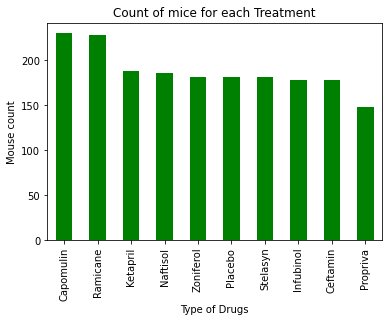

In [13]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
num_mice = clean_data["Drug Regimen"].value_counts()
y_axis=num_mice.values
x_axis=num_mice.index

num_mice.plot(kind="bar", facecolor='green')

plt.ylabel("Mouse count")
plt.xlabel("Type of Drugs")
plt.title("Count of mice for each Treatment")
plt.xticks(rotation=90)
plt.show()

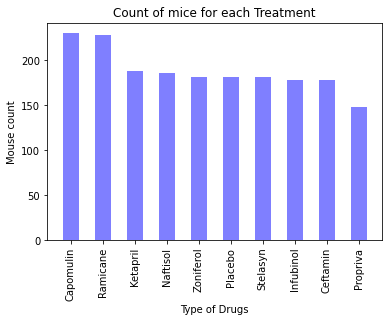

In [14]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
num_mice = clean_data["Drug Regimen"].value_counts()
y_axis=num_mice.values
x_axis=num_mice.index

plt.bar(x_axis,y_axis,color='blue',alpha=0.5, align='center', width = 0.5)

plt.ylabel("Mouse count")
plt.xlabel("Type of Drugs")
plt.title("Count of mice for each Treatment")
plt.xticks(rotation=90)
plt.show()


In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mf_count=clean_data["Sex"].value_counts()
mf_count


Male      958
Female    922
Name: Sex, dtype: int64

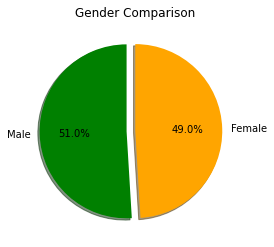

In [16]:
#creating lables for each section
lables= mf_count.index

sizes =mf_count.values
colors=['green','orange']
explode =[0.1,0]

#using pandas
mf_count.plot(kind='pie',explode=explode,colors=colors, autopct='%1.1f%%',shadow= True, startangle=90)

plt.title('Gender Comparison')
plt.ylabel(' ')
plt.show()

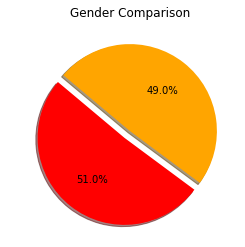

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

mf_count=clean_data["Sex"].value_counts()

#creating lables for each section
lables= mf_count.index

sizes =mf_count.values
colors=['red','orange']
explode =[0.1,0]

#using pyplot
plt.pie(sizes,explode=explode,colors=colors, autopct='%1.1f%%',shadow= True, startangle=140)

plt.title('Gender Comparison')
plt.ylabel(' ')
plt.show()

## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

max_timepoint = clean_data.groupby("Mouse ID").max().reset_index()
max_timepoint




,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,Propriva,Female,12,26,10,48.710661,0
244,z578,Ramicane,Male,11,16,45,45.000000,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [19]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

merge_df = max_timepoint[["Mouse ID","Timepoint"]].merge(clean_data, on=["Mouse ID","Timepoint"], how='left')
merge_df.round(2)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.97,2
1,a251,45,Infubinol,Female,21,25,65.53,1
2,a262,45,Placebo,Female,17,29,70.72,4
3,a275,45,Ceftamin,Female,20,28,63.00,3
4,a366,30,Stelasyn,Female,16,29,63.44,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.71,0
244,z578,45,Ramicane,Male,11,16,30.64,0
245,z581,45,Infubinol,Female,24,25,62.75,3
246,z795,45,Naftisol,Female,13,29,65.74,3


In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

capomulin= merge_df.loc[merge_df['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']
ramicane= merge_df.loc[merge_df['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']
infubinol=merge_df.loc[merge_df['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)']
ceftamin= merge_df.loc[merge_df['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']

pd = pd.DataFrame({"capomulin":capomulin,"ramicane":ramicane,"infubinol":infubinol,"ceftamin":ceftamin})
pd


,capomulin,ramicane,infubinol,ceftamin
0,NaN,NaN,67.973419,NaN
1,NaN,NaN,65.525743,NaN
3,NaN,NaN,NaN,62.999356
6,NaN,38.407618,NaN,NaN
7,NaN,43.047543,NaN,NaN
...,...,...,...,...
238,NaN,NaN,NaN,68.594745
239,31.896238,NaN,NaN,NaN
240,NaN,NaN,NaN,64.729837
244,NaN,30.638696,NaN,NaN


In [21]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

#Capomulin quartiles
quartile_cap= capomulin.quantile([.25,.5,.75])
lower_cap= quartile_cap[.25]
upper_cap=quartile_cap[.75]
iqr= upper_cap-lower_cap

#Capomulin quartiles
lower_ocap= lower_cap-(1.5*iqr)
upper_ocap= upper_cap+(1.5*iqr)
    
print(f"Any number below {round(lower_ocap, 2)} is considered an outlier")
print(f"Any number above {round(upper_ocap, 2)} is considered an outlier")   

    

Any number below 20.7 is considered an outlier
Any number above 51.83 is considered an outlier


In [22]:
#Ramicane quartiles
quartile_ram= ramicane.quantile([.25,.5,.75])
lower_ram= quartile_ram[.25]
upper_ram=quartile_ram[.75]
iqr= upper_ram-lower_ram
#Ramicane Outliers
lower_oram= lower_ram-(1.5*iqr)
upper_oram= upper_ram+(1.5*iqr)

print(f"Any number below {round(lower_oram, 2)} is considered an outlier")
print(f"Any number above {round(upper_oram, 2)} is considered an outlier")

Any number below 17.91 is considered an outlier
Any number above 54.31 is considered an outlier


In [23]:
#Infubionol quartiles
quartile_in=infubinol.quantile([.25,.5,.75])
lower_in= quartile_in[.25]
upper_in=quartile_in[.75]
iqr= upper_in-lower_in
#Infubionol Outliers
lower_oin= lower_in-(1.5*iqr)
upper_oin= upper_in+(1.5*iqr)

print(f"Any number below {round(lower_oin, 2)} is considered an outlier")
print(f"Any number above {round(upper_oin, 2)} is considered an outlier")

Any number below 36.83 is considered an outlier
Any number above 82.74 is considered an outlier


In [24]:
#Ceftmain quartiles
quartile_ce=ceftamin.quantile([.25,.5,.75])
lower_ce= quartile_ce[.25]
upper_ce=quartile_ce[.75]
iqr= upper_ce-lower_ce
#Ceftmain Outliers
lower_oce= lower_ce-(1.5*iqr)
upper_oce= upper_ce+(1.5*iqr)

print(f"Any number below {round(lower_oce, 2)} is considered an outlier")
print(f"Any number above {round(upper_oce, 2)} is considered an outlier")

Any number below 25.36 is considered an outlier
Any number above 87.67 is considered an outlier


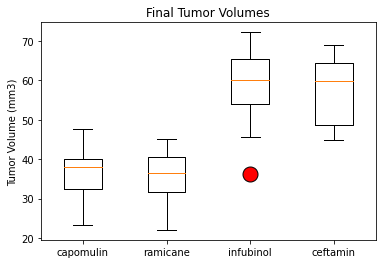

In [25]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

orange_out = dict(markerfacecolor='red',markersize=15)

#Box Plot
plt.boxplot([capomulin,ramicane, infubinol, ceftamin], 
            labels=["capomulin","ramicane","infubinol","ceftamin"], flierprops= orange_out)

#formatting the graph

plt.title("Final Tumor Volumes")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

In [26]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

capomulin_table= clean_data.loc[clean_data['Drug Regimen'] == 'Capomulin']
capomulin_table




,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [27]:
mouse= clean_data.loc[clean_data['Mouse ID'] == 's185']
mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


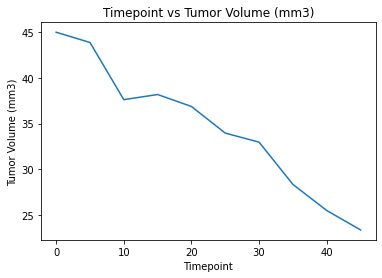

In [28]:
plt.plot(mouse["Timepoint"], mouse["Tumor Volume (mm3)"])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Timepoint vs Tumor Volume (mm3)")
plt.show()

In [29]:
# Generate a scatter plot of mouse average weight versus average tumor volume for the Capomulin regimen.

capomulin_weight= clean_data.loc[clean_data['Drug Regimen'] == 'Capomulin']

cap_avg=capomulin_weight.groupby(["Mouse ID"]).mean()

cap_avg

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.70
b742,7.0,21.0,22.5,40.083699,0.00
f966,16.0,17.0,10.0,36.505973,0.00
g288,3.0,19.0,22.5,41.990097,0.80
g316,22.0,22.0,22.5,44.613344,1.00
i557,1.0,24.0,22.5,44.805810,0.20
i738,23.0,20.0,22.5,39.141053,0.60
j119,7.0,23.0,22.5,44.465236,0.60
j246,21.0,21.0,17.5,43.216925,0.25


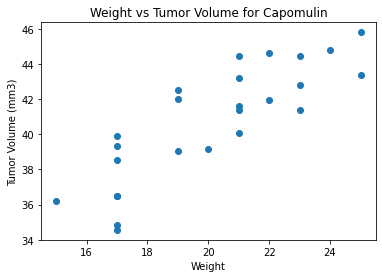

In [30]:
#scatter Plot
plt.scatter(cap_avg["Weight (g)"],cap_avg["Tumor Volume (mm3)"] )
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()

## Correlation and Regression

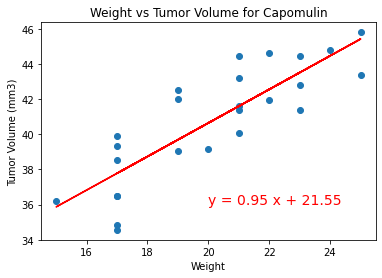

In [31]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept,rvalue, pvalue, stderr)= linregress(cap_avg["Weight (g)"],cap_avg["Tumor Volume (mm3)"])
regress_values=cap_avg["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(cap_avg["Weight (g)"],cap_avg["Tumor Volume (mm3)"] )
plt.plot(cap_avg["Weight (g)"], regress_values, color='red')
plt.annotate(line_eq,(20,36), color='red', fontsize=14)
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()


In [32]:
print(f"Correlation between these two variables is {round(rvalue,2)}")

Correlation between these two variables is 0.84
